# Stroke Prediction 
Introduction

In this project, we aim to predict the likelihood of a stroke in patients based on various clinical features such as age, hypertension, heart disease, glucose levels, and lifestyle factors.

Stroke is one of the leading causes of death and disability worldwide. Early prediction and prevention are crucial to reduce its impact and save lives.



# Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# Import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Check datset features names 

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.shape

(5110, 12)

In [6]:
# check Null values 

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Here in bmi column in 201 null value so i fill that null values with mean of that column. 

In [8]:
# Fill Null values 

df['bmi'].fillna(df['bmi'].mean() , inplace =True)

C:\Users\brije\AppData\Local\Temp\ipykernel_25820\303560138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean() , inplace =True)


In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Now There no Any NUll values are there . 

In [10]:
# Check Duplicate Records 

df.duplicated().sum()

0

- No Duplicate Records in the dataset .

In [12]:
cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

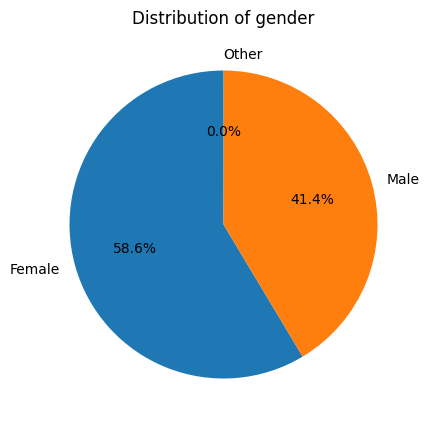

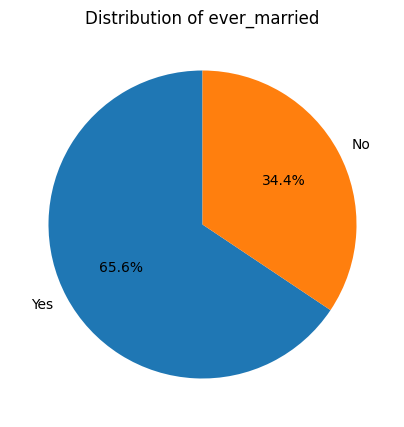

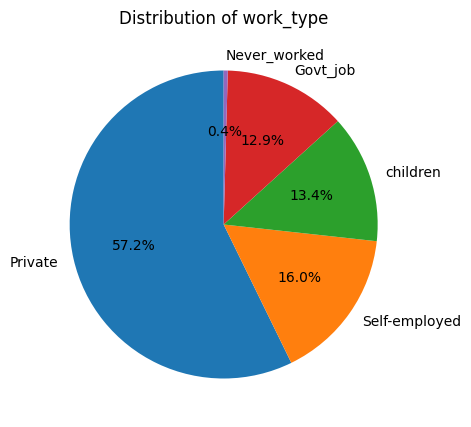

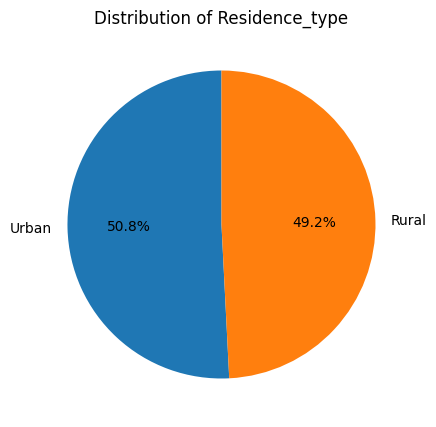

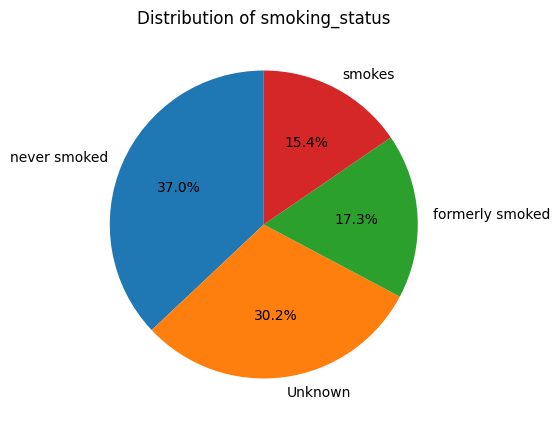

In [14]:
for col in cols:
    plt.figure(figsize=(5,5))
    df_counts = df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.show()

- Here above shows distribution of the data in that columns . but all are in categorical data so we need to convert into NUmberical . For that i use LabelEncoder. 

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in cols :
    df[i] = encoder.fit_transform(df[i])

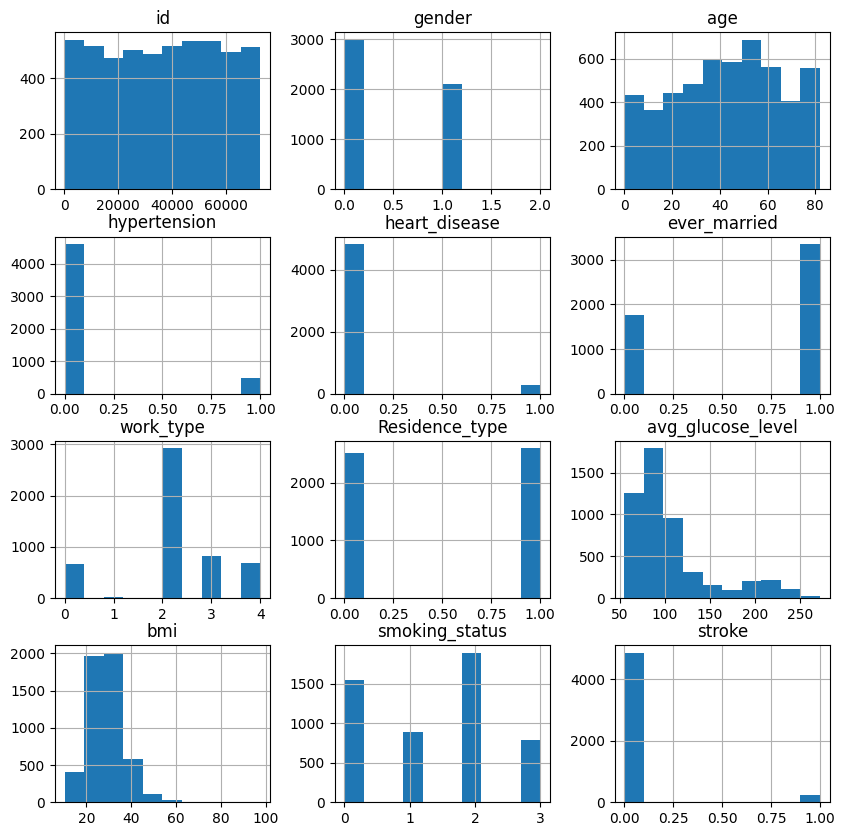

In [17]:
df.hist(figsize=(10,10))
plt.show()

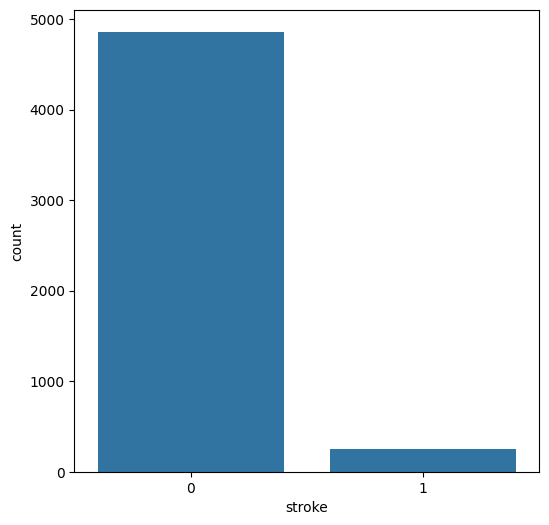

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='stroke',data=df)
plt.show()


<Axes: >

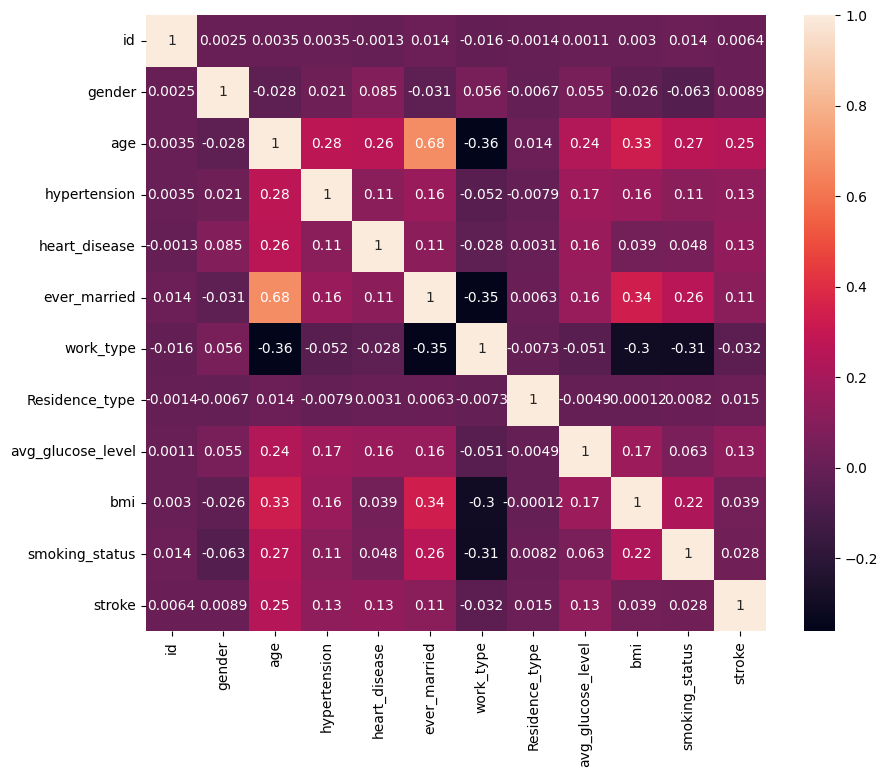

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot  = True)

- Here all coumns are correlated with each other rather than id column so we can drop that also . 

In [22]:
df = df.drop('id' , axis = 1)

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [25]:
# Convert into dependent and Independent feature

X = df.drop('stroke' , axis = 1)
y = df['stroke']

In [26]:
X 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [27]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [29]:
# Split data into train and test part 

from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42)

In [30]:
X_train.shape , X_test.shape

((4088, 10), (1022, 10))

# Model Training 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Logistic Regression 

Accuracy :  0.9403131115459883
[[960  61]
 [  0   1]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1021
           1       0.02      1.00      0.03         1

    accuracy                           0.94      1022
   macro avg       0.51      0.97      0.50      1022
weighted avg       1.00      0.94      0.97      1022



c:\Users\brije\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


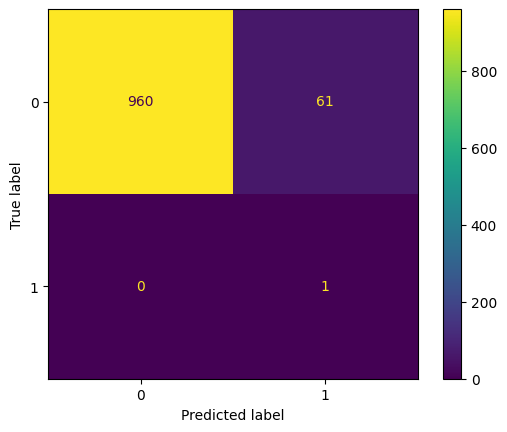

In [33]:
log = LogisticRegression()

log.fit(X_train , y_train)

y_pred_log = log.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_log , y_test))
print(confusion_matrix(y_pred_log , y_test))
print(classification_report(y_pred_log , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_log , y_test))
cm.plot()



# 2. DecisionTreeClassifier

Accuracy :  0.9168297455968689
[[927  52]
 [ 33  10]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       979
           1       0.16      0.23      0.19        43

    accuracy                           0.92      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.93      0.92      0.92      1022



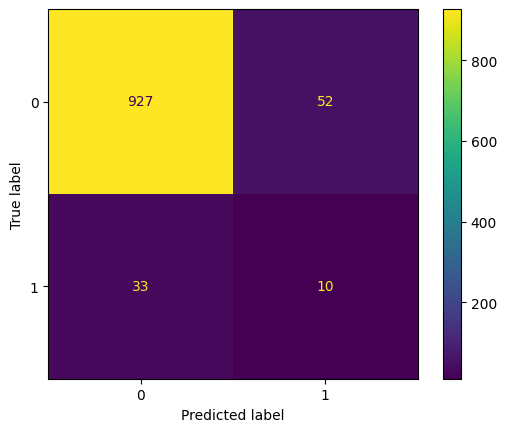

In [34]:
tree = DecisionTreeClassifier()

tree.fit(X_train , y_train)

y_pred_tree = tree.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_tree , y_test))
print(confusion_matrix(y_pred_tree , y_test))
print(classification_report(y_pred_tree , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_tree , y_test))
cm.plot()



# 3. Support Vector Machine : classifier 

Accuracy :  0.9393346379647749
[[960  62]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       1.00      0.94      0.97      1022



c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


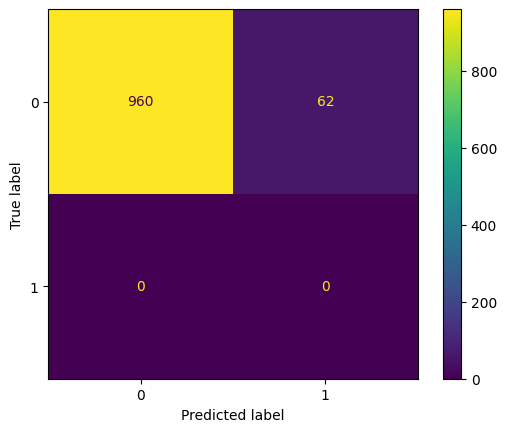

In [35]:
svc = SVC()

svc.fit(X_train , y_train)

y_pred_svc = svc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_svc , y_test))
print(confusion_matrix(y_pred_svc , y_test))
print(classification_report(y_pred_svc , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_svc , y_test))
cm.plot()



# 4. RandomForest Classifier

Accuracy :  0.9393346379647749
[[960  62]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       1.00      0.94      0.97      1022



c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


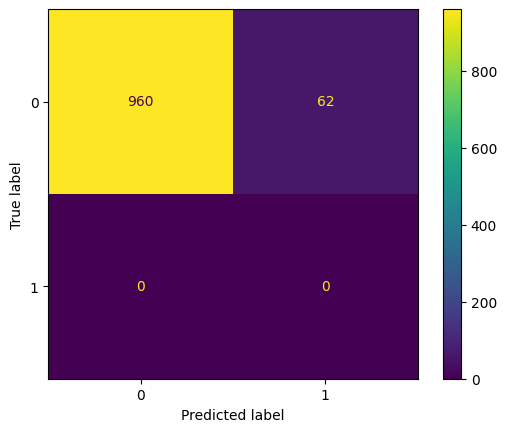

In [36]:
forest = RandomForestClassifier()

forest.fit(X_train , y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_forest , y_test))
print(confusion_matrix(y_pred_forest , y_test))
print(classification_report(y_pred_forest , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_forest , y_test))
cm.plot()




# 5. GradientBoostingClassifier

Accuracy :  0.9403131115459883
[[960  61]
 [  0   1]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1021
           1       0.02      1.00      0.03         1

    accuracy                           0.94      1022
   macro avg       0.51      0.97      0.50      1022
weighted avg       1.00      0.94      0.97      1022



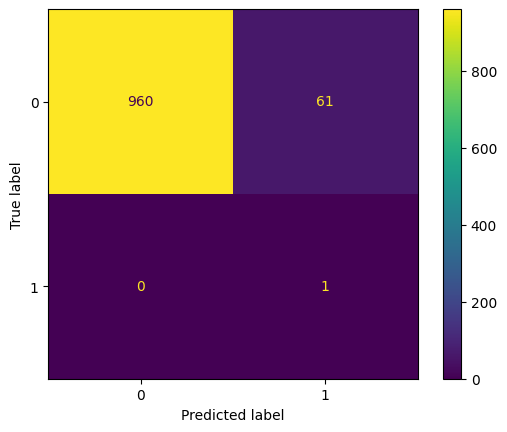

In [37]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train , y_train)

y_pred_gbc = gbc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_gbc , y_test))
print(confusion_matrix(y_pred_gbc , y_test))
print(classification_report(y_pred_gbc , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_gbc , y_test))
cm.plot()

# 6. XGBClassifier

Accuracy :  0.9393346379647749
[[954  56]
 [  6   6]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1010
           1       0.10      0.50      0.16        12

    accuracy                           0.94      1022
   macro avg       0.55      0.72      0.57      1022
weighted avg       0.98      0.94      0.96      1022



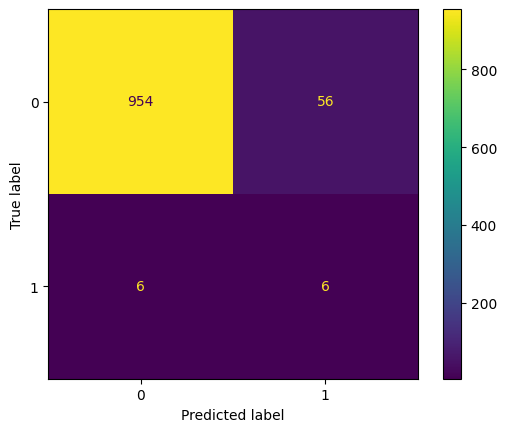

In [38]:
xgb = XGBClassifier()

xgb.fit(X_train , y_train)

y_pred_xgb = xgb.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_xgb , y_test))
print(confusion_matrix(y_pred_xgb , y_test))
print(classification_report(y_pred_xgb , y_test))
cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_xgb , y_test))
cm.plot()

# Models Comparision

In [41]:
from sklearn.metrics import f1_score, recall_score, precision_score

results = []
results.append({
    'ML_Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_pred_log, y_test),
    'f1_score': f1_score(y_pred_log, y_test),
    'Recall': recall_score(y_pred_log, y_test),
    'Precision': precision_score(y_pred_log, y_test)
})
results.append({
    'ML_Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_pred_tree, y_test),
    'f1_score': f1_score(y_pred_tree, y_test),
    'Recall': recall_score(y_pred_tree, y_test),
    'Precision': precision_score(y_pred_tree, y_test)
})
results.append({
    'ML_Model': 'Support Vector Machine',
    'Accuracy': accuracy_score(y_pred_svc, y_test),
    'f1_score': f1_score(y_pred_svc, y_test),
    'Recall': recall_score(y_pred_svc, y_test),
    'Precision': precision_score(y_pred_svc, y_test)
})
results.append({
    'ML_Model': 'Random Forest',
    'Accuracy': accuracy_score(y_pred_forest, y_test),
    'f1_score': f1_score(y_pred_forest, y_test),
    'Recall': recall_score(y_pred_forest, y_test),
    'Precision': precision_score(y_pred_forest, y_test)
})
results.append({
    'ML_Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_pred_gbc, y_test),
    'f1_score': f1_score(y_pred_gbc, y_test),
    'Recall': recall_score(y_pred_gbc, y_test),
    'Precision': precision_score(y_pred_gbc, y_test)
})
results.append({
    'ML_Model': 'XGBClassifier',
    'Accuracy': accuracy_score(y_pred_xgb, y_test),
    'f1_score': f1_score(y_pred_xgb, y_test),
    'Recall': recall_score(y_pred_xgb, y_test),
    'Precision': precision_score(y_pred_xgb, y_test)
})


summary_df = pd.DataFrame(results)
summary_df

c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brije\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,ML_Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.940313,0.031746,1.000000,0.016129
1,Decision Tree,0.916830,0.190476,0.232558,0.161290
2,Support Vector Machine,0.939335,0.000000,0.000000,0.000000
3,Random Forest,0.939335,0.000000,0.000000,0.000000
4,Gradient Boosting,0.940313,0.031746,1.000000,0.016129
5,XGBClassifier,0.939335,0.162162,0.500000,0.096774


In [42]:
summary_df = summary_df.sort_values(['Accuracy', 'f1_score'], ascending=False).reset_index(drop=True)

In [43]:
summary_df

,ML_Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.940313,0.031746,1.000000,0.016129
1,Gradient Boosting,0.940313,0.031746,1.000000,0.016129
2,XGBClassifier,0.939335,0.162162,0.500000,0.096774
3,Support Vector Machine,0.939335,0.000000,0.000000,0.000000
4,Random Forest,0.939335,0.000000,0.000000,0.000000
5,Decision Tree,0.916830,0.190476,0.232558,0.161290


- LogisticRegression performs the best.

In [44]:
import pickle

# Save the trained LogisticRegression model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log, f)